In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orig_dwpc = pd.read_table('../../learn-orig/all-features/data/matrix/features.tsv.bz2')
orig_dwpc.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,rephetio-v2.0_perm-5,DB00014,DOID:0060073,0,1,lymphatic system cancer,Goserelin,0.022675,2,249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028591,0.004754,0.0,0.0


In [3]:
orig_dwpc = orig_dwpc.loc[orig_dwpc['hetnet'] == 'rephetio-v2.0']
orig_dwpc.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
1,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028591,0.004754,0.0,0.0
13,rephetio-v2.0,DB00206,DOID:0060073,0,1,lymphatic system cancer,Reserpine,0.011069,8,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003003,0.001488,0.0,0.0


In [4]:
mat_dwpc = pd.read_table('dwpc-features.tsv.bz2')
mat_dwpc.head(2)

,compound_id,disease_id,CdGuAeGuD,CtDdGdCpD,CbGr>GdDrD,CbG<rGuAlD,CbGuDrD,CtDuGcGdD,CuGiGdCpD,CcSEcCtDrD,...,CuGuCuGdD,CtDpCrCtD,CbG<rG<rGdD,CbGcGuD,CuGaDtCpD,CbGiGuAlD,CpDrDpCpD,CbGdDtCtD,CtDuGuCpD,CdG<rG<rGuD
0,DB00014,DOID:0050156,0.0,0.0,0.0,0.0,0.0,0.002994,0.0,0.02486,...,0.002064,0.0,0.0,0.0,0.0,0.000212,0.0,0.0,0.002600,0.0
1,DB00014,DOID:0050425,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.01214,...,0.000000,0.0,0.0,0.0,0.0,0.000767,0.0,0.0,0.003606,0.0


In [5]:
m = pd.merge(orig_dwpc, mat_dwpc, how='left', on=['compound_id', 'disease_id'], suffixes=('', '_mat'))

In [6]:
m.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuCuGdD_mat,CtDpCrCtD_mat,CbG<rG<rGdD_mat,CbGcGuD_mat,CuGaDtCpD_mat,CbGiGuAlD_mat,CpDrDpCpD_mat,CbGdDtCtD_mat,CtDuGuCpD_mat,CdG<rG<rGuD_mat
0,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001532,0.0,0.0
1,rephetio-v2.0,DB00206,DOID:0060073,0,1,lymphatic system cancer,Reserpine,0.011069,8,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004499,0.0,0.0


In [7]:
def is_same(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return (abs(diff) > .0001).sum() == 0

In [8]:
is_same(m['CbGaD'], m['CbGaD_mat'])

True

In [9]:
is_same(m['CuGuDtCtD'], m['CuGuDtCtD_mat'])

False

In [10]:
def plot_difference(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    
    dwpc_nonzero = (old_dwpc != 0).sum()
    mat_nonzero = (new_dwpc != 0).sum()
    became_nonzero = ((old_dwpc == 0) & (new_dwpc != 0)).sum()
    
    num_different = (abs(diff) > 0.0001).sum()
    sns.distplot(diff[abs(diff) > .0001], kde=False, rug=True)
    
    feature = old_dwpc.name
    
    text = """
    Non-Zero DWPC values (no-replacement): {}
    Zero DWPC values that became Non-Zero: {}
    Total number of values that changed: {}""".format(dwpc_nonzero, became_nonzero, num_different)
    
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    x_mid = (xlim[1] + xlim[0]) / 2
    y_mid = (ylim[1] + ylim[0]) / 2
    
    plt.text(2*x_mid/3, 3*y_mid/2, text)
    plt.xlabel('Difference in DWPC calculation (Neo4j - Matrix)')
    plt.ylabel('Frequency')
    plt.title('Distribution of differences of calcualtion of feature {}'.format(feature))

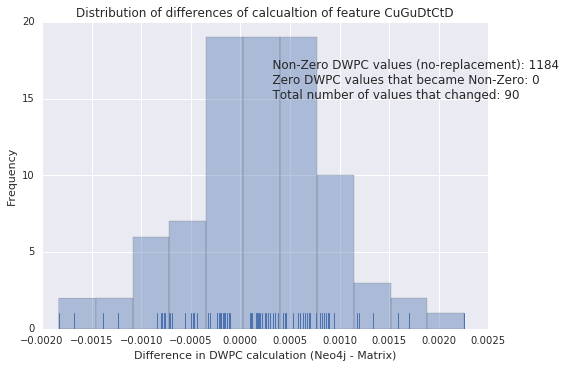

In [11]:
plot_difference(m['CuGuDtCtD'], m['CuGuDtCtD_mat'])

In [12]:
mp = 'CuGeAeGaD'

def compare_metapath(mp):
    if is_same(m[mp], m[mp+'_mat']):
        print('The Neo4j and Matrix calculations are the same for metapath {}'.format(mp))
    else:
        plot_difference(m[mp], m[mp+'_mat'])

In [13]:
compare_metapath(mp)

The Neo4j and Matrix calculations are the same for metapath CuGeAeGaD


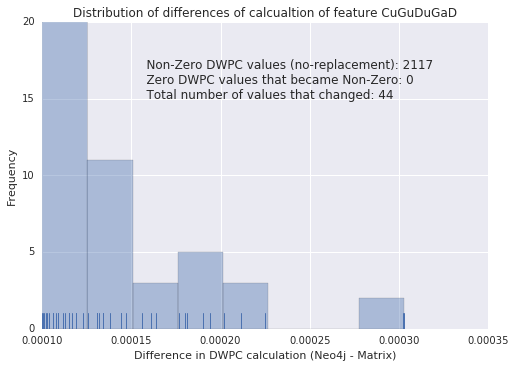

In [14]:
mp = 'CuGuDuGaD'
compare_metapath(mp)

In [15]:
metapaths = list(orig_dwpc.columns)[24:]

In [16]:
metapaths[:10]

['CbG<rG<rGaD',
 'CbG<rG<rGdD',
 'CbG<rG<rGuD',
 'CbG<rGaD',
 'CbG<rGaDrD',
 'CbG<rGbCpD',
 'CbG<rGbCtD',
 'CbG<rGcGaD',
 'CbG<rGcGdD',
 'CbG<rGcGuD']

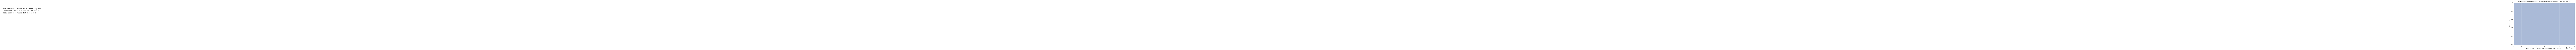

In [17]:
mp = 'CbG<rG<rGuD'
compare_metapath(mp)

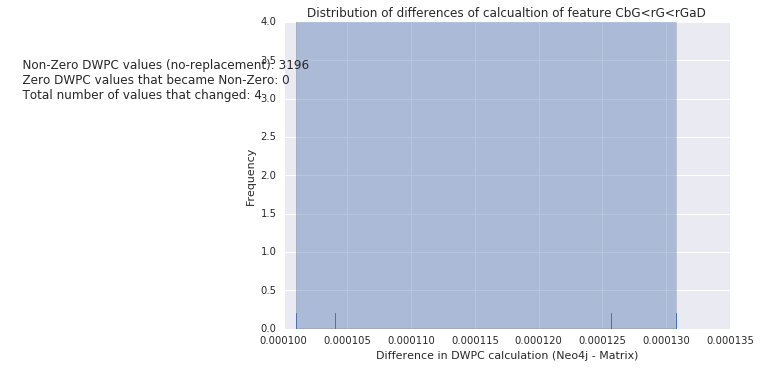

In [19]:
mp = 'CbG<rG<rGaD'
compare_metapath(mp)

In [20]:
res = 0
for mp in metapaths:
    res += is_same(m[mp], m[mp+'_mat'])
print('{} / {} = {:1.2%}'.format(res, len(metapaths), (res/len(metapaths))))

1033 / 1206 = 85.66%


In [21]:
def num_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return sum(abs(diff) > 0.0001)

def max_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return max(abs(diff))

def avg_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return diff[abs(diff) > .0001].mean()

In [22]:
dmps = []
nd = []
md = []
ad = []

for mp in metapaths:
    o = m[mp]
    n = m[mp+'_mat']
    
    if not is_same(o, n):
        dmps.append(mp)
        nd.append(num_diff(o, n))
        md.append(max_diff(o, n))
        ad.append(avg_diff(o, n))
        
result = pd.DataFrame({'num_diff': nd, 'max_diff': md, 'avg_diff': ad}, index=dmps)
result.head()

,avg_diff,max_diff,num_diff
CbG<rG<rGaD,0.000115,0.000131,4
CbG<rG<rGuD,0.000100,0.000101,2
CbG<rGr>GaD,0.000704,0.006675,632
CbG<rGr>GdD,0.000871,0.003498,81
CbG<rGr>GuD,0.000847,0.003716,132


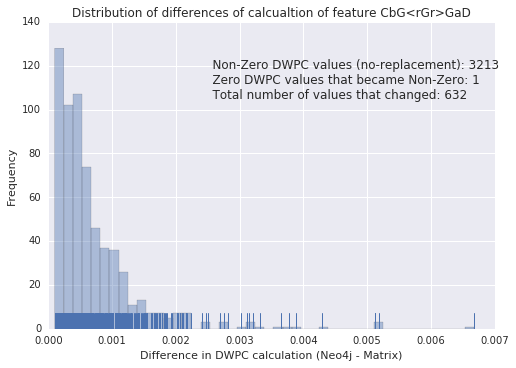

In [24]:
compare_metapath('CbG<rGr>GaD')

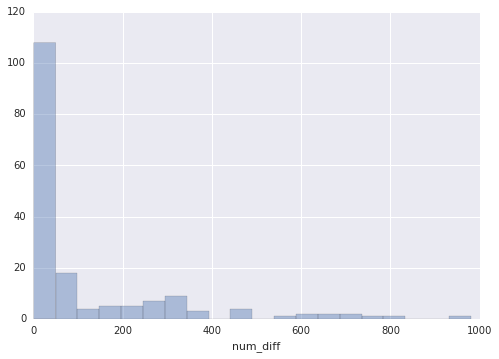

In [25]:
sns.distplot(result['num_diff'], kde=False)

In [65]:
result.query('num_diff > 900')

,avg_diff,max_diff,num_diff
CbGbCbGaD,0.000835,0.015557,980


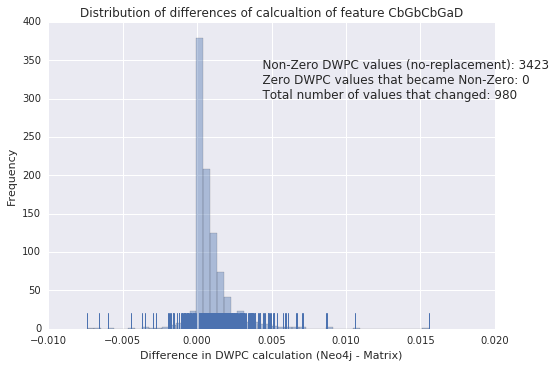

In [26]:
compare_metapath('CbGbCbGaD')

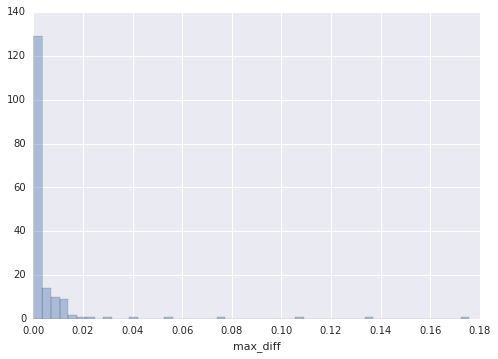

In [27]:
sns.distplot(result['max_diff'], kde=False)

In [28]:
result.query('max_diff > .15')

,avg_diff,max_diff,num_diff
CrCrCrCtD,0.026721,0.17579,447


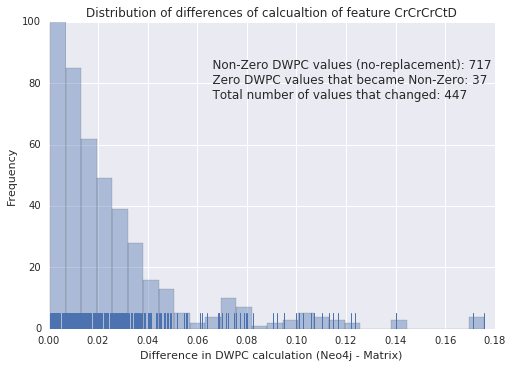

In [30]:
compare_metapath('CrCrCrCtD')

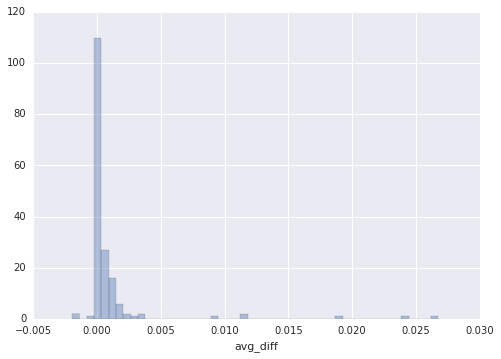

In [31]:
sns.distplot(result['avg_diff'], kde=False)

In [33]:
result.sort_values('avg_diff')[:5]

,avg_diff,max_diff,num_diff
CpDrDtCtD,-0.001966,0.012412,14
CrCpDtCtD,-0.001860,0.004803,10
CbGaDdGdD,-0.000448,0.000448,1
CbGdDtCtD,-0.000237,0.000851,19
CdGdDdGdD,-0.000204,0.000819,59


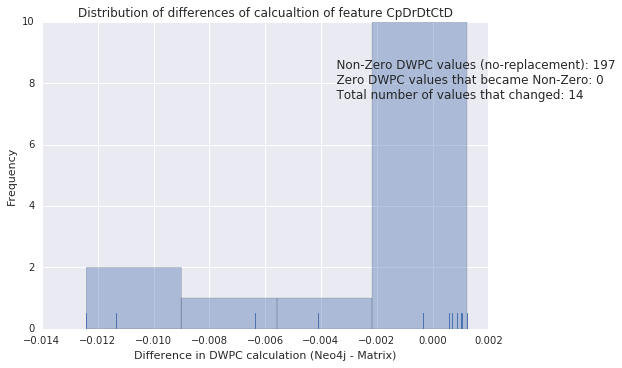

In [34]:
compare_metapath('CpDrDtCtD')

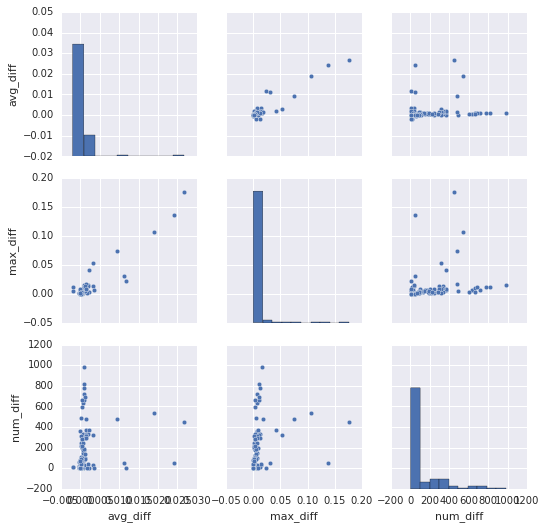

In [35]:
sns.pairplot(result)

In [36]:
for mp in dmps:
    print(mp)

CbG<rG<rGaD
CbG<rG<rGuD
CbG<rGr>GaD
CbG<rGr>GdD
CbG<rGr>GuD
CbGaDaGaD
CbGaDaGdD
CbGaDaGuD
CbGaDdGaD
CbGaDdGdD
CbGaDtCtD
CbGaDuGaD
CbGbCbGaD
CbGbCbGdD
CbGbCbGuD
CbGbCuGdD
CbGbCuGuD
CbGcG<rGaD
CbGdCdGaD
CbGdCdGdD
CbGdCdGuD
CbGdDaGaD
CbGdDaGuD
CbGdDdGaD
CbGdDdGdD
CbGdDtCtD
CbGiG<rGaD
CbGiG<rGdD
CbGiGr>GaD
CbGiGr>GdD
CbGiGr>GuD
CbGr>G<rGaD
CbGr>G<rGdD
CbGr>G<rGuD
CbGr>Gr>GaD
CbGr>Gr>GuD
CbGuCuGaD
CbGuCuGdD
CbGuCuGuD
CbGuDaGaD
CbGuDtCtD
CbGuDuGaD
CbGuDuGuD
CdG<rG<rGaD
CdG<rG<rGdD
CdG<rG<rGuD
CdG<rGr>GaD
CdG<rGr>GdD
CdG<rGr>GuD
CdGaDaGaD
CdGaDaGdD
CdGaDaGuD
CdGaDdGaD
CdGaDtCtD
CdGbCbGaD
CdGbCbGuD
CdGcGr>GaD
CdGcGr>GdD
CdGcGr>GuD
CdGdCdGaD
CdGdCdGdD
CdGdCdGuD
CdGdDaGaD
CdGdDdGaD
CdGdDdGdD
CdGdDtCtD
CdGiG<rGdD
CdGiG<rGuD
CdGiGr>GdD
CdGiGr>GuD
CdGr>G<rGaD
CdGr>G<rGdD
CdGr>G<rGuD
CdGr>Gr>GaD
CdGr>Gr>GdD
CdGr>Gr>GuD
CdGuDpCpD
CdGuDtCtD
CdGuDuGaD
CdGuDuGuD
CpDaGbCpD
CpDaGdCpD
CpDpCbGaD
CpDpCbGdD
CpDpCdGuD
CpDpCpD
CpDpCpDrD
CpDpCrCpD
CpDpCtDrD
CpDrDpCpD
CpDrDrDrD
CpDrDtCpD
CpDrDtCtD
CpDuGbCpD
CpDuG